# Salary Band Prediction Case Study
In this case study, our task is to create a machine learning model which can predict whether a person makes over a salary more than $50K/yr or not based on his education, race, occupation etc.


The flow of the case study is as below:
* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple Regression algorithms
* Selecting the best Model
* Deploying the best model in production

# Reading the data into python
The data has one file "SalaryData.csv". This file contains contains the historical census data data of 32,561 working professionals from all over the world indicating whether they earn more than $50K or not.

The goal is to learn from this data and predict if predict whether a person's income exceeds $50K/yr or not based on census data 

## Data description
Extraction was done by Barry Becker from the 1994 Census database.
* Dataset link: https://www.kaggle.com/datasets/ayessa/salary-prediction-classification
The business meaning of each column in the data is as below


* <b>age</b>: Age of the employee
* <b>workclass</b>: Which type of organization the employee works in?<b> Private, Self-emp-not-inc, Self-emp-inc, Federal- gov,   Local-gov,State-gov, Without-pay, Never-worked.</b>
* <b>fnlwgt</b>: final weight, which is the number of units in the target population that the responding unit represents
* <b>education</b>: The highest education of the employee. <b>Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm,   Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool</b>
* <b>education_num</b>: numeric code for the highest education of the employee. 1 to 16.
* <b>marital_status</b>: The marital status of the employee.<b> Married-civ-spouse, Divorced, Never-married, Separated, 
    Widowed, Married-spouse-absent, Married-AF-spouse</b>
* <b>occupation</b>: The type of job.<b> Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty,
    Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, 
    Armed-Forces.</b>
* <b>relationship</b>:<b> Type of relationship in? Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.</b>
* <b>race</b>>: Which race the employee belongs to.<b> White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.</b>
* <b>sex</b>: Gender of the employee.<b> Female, Male</b>
* <b>capital_gain</b>: How much capital gains does the employee gets in an year
* <b>capital.loss</b>: How much capital loss does the employee bears in an year
* <b>hours_per_week</b>: How many hours the employee works in a week?
* <b>native_country</b>: Which country the employee is working?<b> United-States, Cambodia, England, Puerto-Rico, Canada, 
    Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland,
    Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, 
    Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago , Peru, Hong, Holand-Netherlands.</b>
* <b>SalaryGT50K</b>: Is the salary greater than <b>$50,000K</b> or not

for more details: http://archive.ics.uci.edu/ml/datasets/Adult

In [2]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
import pandas as pd
import numpy as np
SalaryData=pd.read_csv('SalaryData.csv', encoding='latin')
print('Shape before deleting duplicate values:', SalaryData.shape)

# Removing duplicate rows if any
SalaryData=SalaryData.drop_duplicates()
print('Shape After deleting duplicate values:', SalaryData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
SalaryData.head(10)

Shape before deleting duplicate values: (32561, 15)
Shape After deleting duplicate values: (32537, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital.loss,hours_per_week,native_country,SalaryGT50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


# Defining the problem statement:
#### Create a Predictive model which can tell if a person makes a salary greater than 50,000 dollars or not?
* Target Variable: SalaryGT50K
* Predictors: age, workclass, education, marital_status, occupation etc.

* SalaryGT50K=0 The employee earns less than 50,000 dollars in a year
* SalaryGT50K=1 The employee earns more than 50,000 dollars in a year

# Determining the type of Machine Learning
Based on the problem statement we can understand that we need to create a supervised ML classification model, as the target variable is categorical.

# Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

<AxesSubplot:xlabel='SalaryGT50K'>

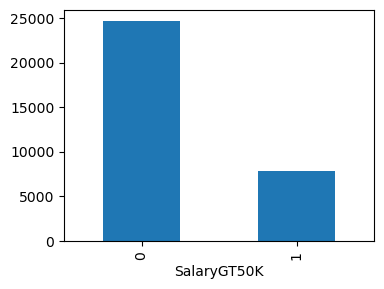

In [4]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=SalaryData.groupby('SalaryGT50K').size()
GroupedData.plot(kind='bar', figsize=(4,3))

The data distribution of the target variable is satisfactory to proceed further. There are equal number of rows for each category to learn from.

# Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.
This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, <b>does this column affect the salary earned by the employee?</b> If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.
​
There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [5]:
# Looking at sample rows in the data
SalaryData.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital.loss,hours_per_week,native_country,SalaryGT50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [6]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
SalaryData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  SalaryGT50K     32537 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


In [7]:
# Looking at the descriptive statistics of the data
SalaryData.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital.loss,hours_per_week,native_country,SalaryGT50K
count,32537.000000,32537,3.253700e+04,32537,32537.000000,32537,32537,32537,32537,32537,32537.000000,32537.000000,32537.000000,32537,32537.000000
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22673,NaN,10494,NaN,14970,4136,13187,27795,21815,NaN,NaN,NaN,29153,NaN
mean,38.585887,NaN,1.897808e+05,NaN,10.081815,NaN,NaN,NaN,NaN,NaN,1078.443741,87.368227,40.440329,NaN,0.240926
std,13.625962,NaN,1.055565e+05,NaN,2.571633,NaN,NaN,NaN,NaN,NaN,7387.957424,403.101833,12.346889,NaN,0.427652
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.369930e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [8]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
SalaryData.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital.loss         92
hours_per_week       94
native_country       42
SalaryGT50K           2
dtype: int64

#### Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created.


* <b>age</b>: Continuous. Selected.
* <b>workclass</b>: Categorical. Selected
* <b>fnlwgt</b>: Continuous. Selected.
* <b>education</b>: Categorical. Selected
* <b>education_num</b>: Categorical. Selected
* <b>marital_status</b>: Categorical. Selected
* <b>occupation</b></b></b></b></b>: Categorical. Selected
* <b>relationship</b></b></b></b>: Categorical. Selected
* <b>race</b></b></b>: Categorical. Selected
* <b>sex</b></b>: Categorical. Selected
* <b>capital_gain</b>: Continuous. Selected.
* <b>capital.loss</b>:Continuous. Selected.
* <b>hours_per_week</b>: Continuous. Selected.
* <b>native_country</b>:Categorical. Selected
* <b>SalaryGT50K</b>: Categorical. Selected. This is the <b>Target Variable</b>!


# Removing useless columns from the data
education and education_num are equivalent. Since education_num is ordinal categorical variable so we are keeping this and removing education column.
Mapping of education and education_num:

* 1: Preschool
* 2: 1st-4th
* 3: 5th-6th
* 4: 7th-8th
* 5: 9th
* 6: 10th
* 7: 11th
* 8: 12th
* 9: HS-grad
* 10: Some-college
* 11: Assoc-voc
* 12: Assoc-acdm
* 13: Bachelors
* 14: Masters
* 15: Prof-school
* 16: Doctorate


In [9]:
# removing education column
UselessColumns=['education']
SalaryData= SalaryData.drop(UselessColumns, axis=1)
SalaryData.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital.loss,hours_per_week,native_country,SalaryGT50K
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

In [10]:
SalaryData.columns
SalaryData['education_num'].nunique()

16

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted eight categorical predictors in the data

Categorical Predictors: 'relationship', 'race', 'sex', 'native_country', workclass', 'education_num', 'marital_status',and 'occupation'

We use bar charts to see how the data is distributed for these categorical columns.

In [11]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(36,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

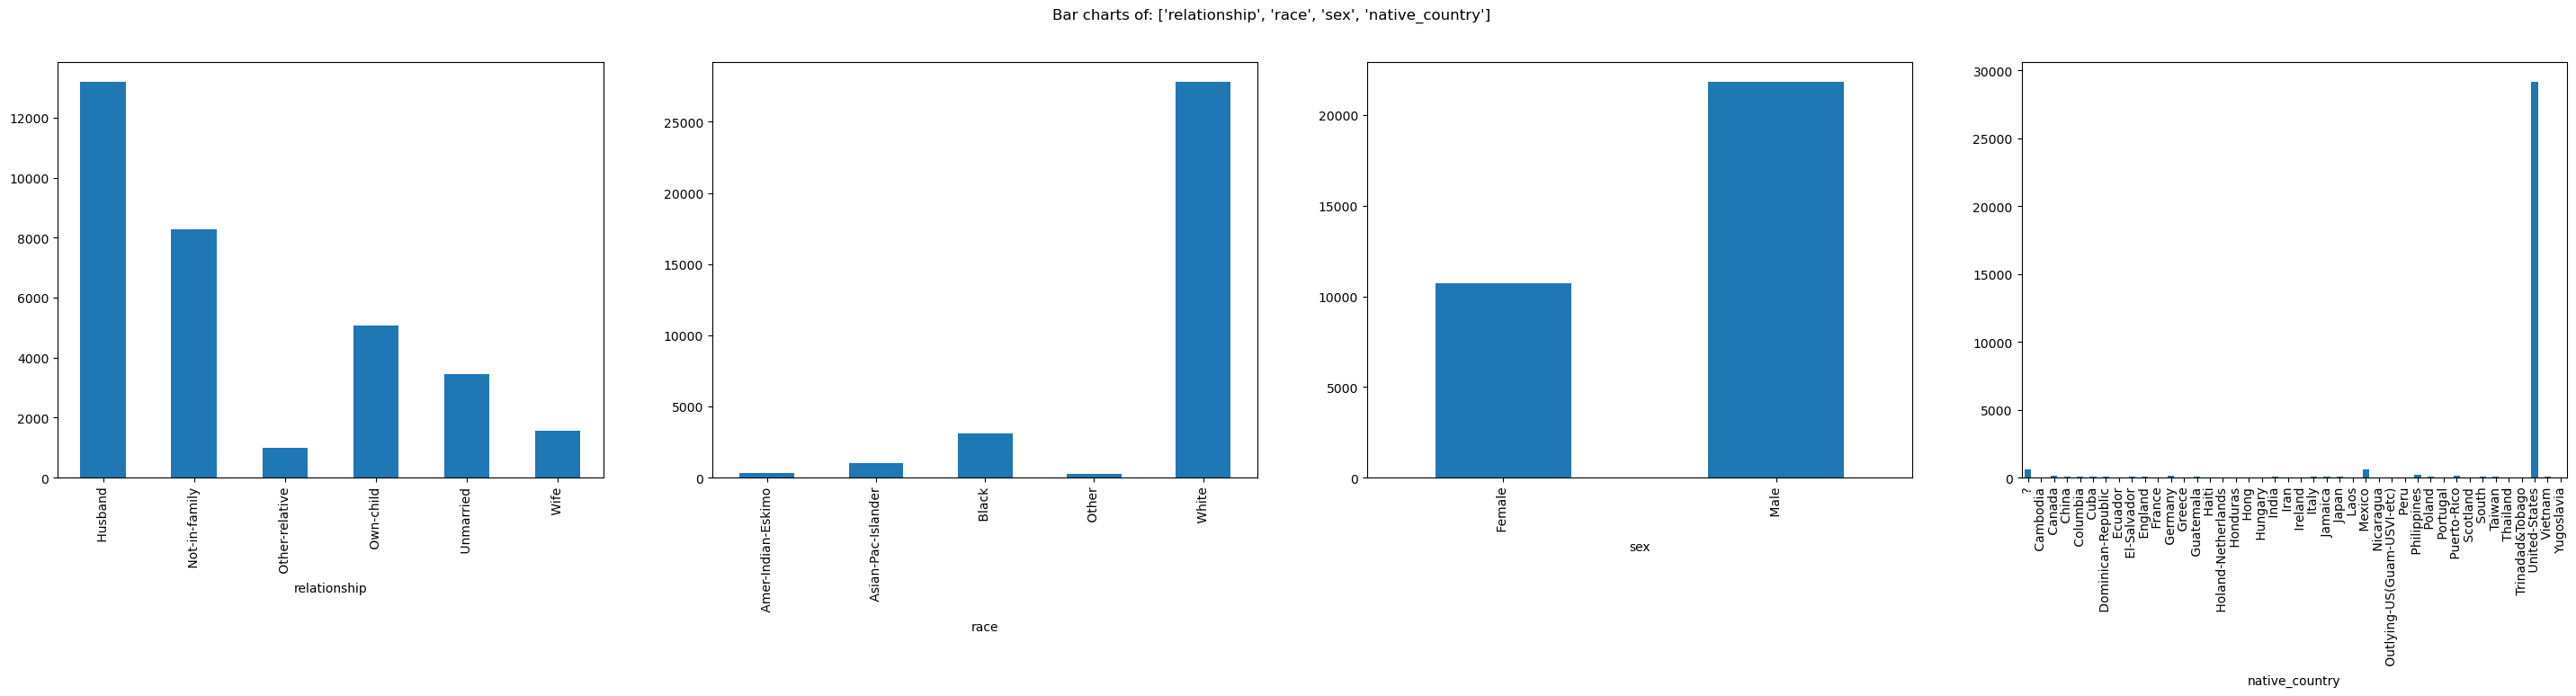

In [12]:
# Calling the function for 5 columns
PlotBarCharts(inpData=SalaryData, 
              colsToPlot=['relationship', 'race', 'sex', 'native_country'])

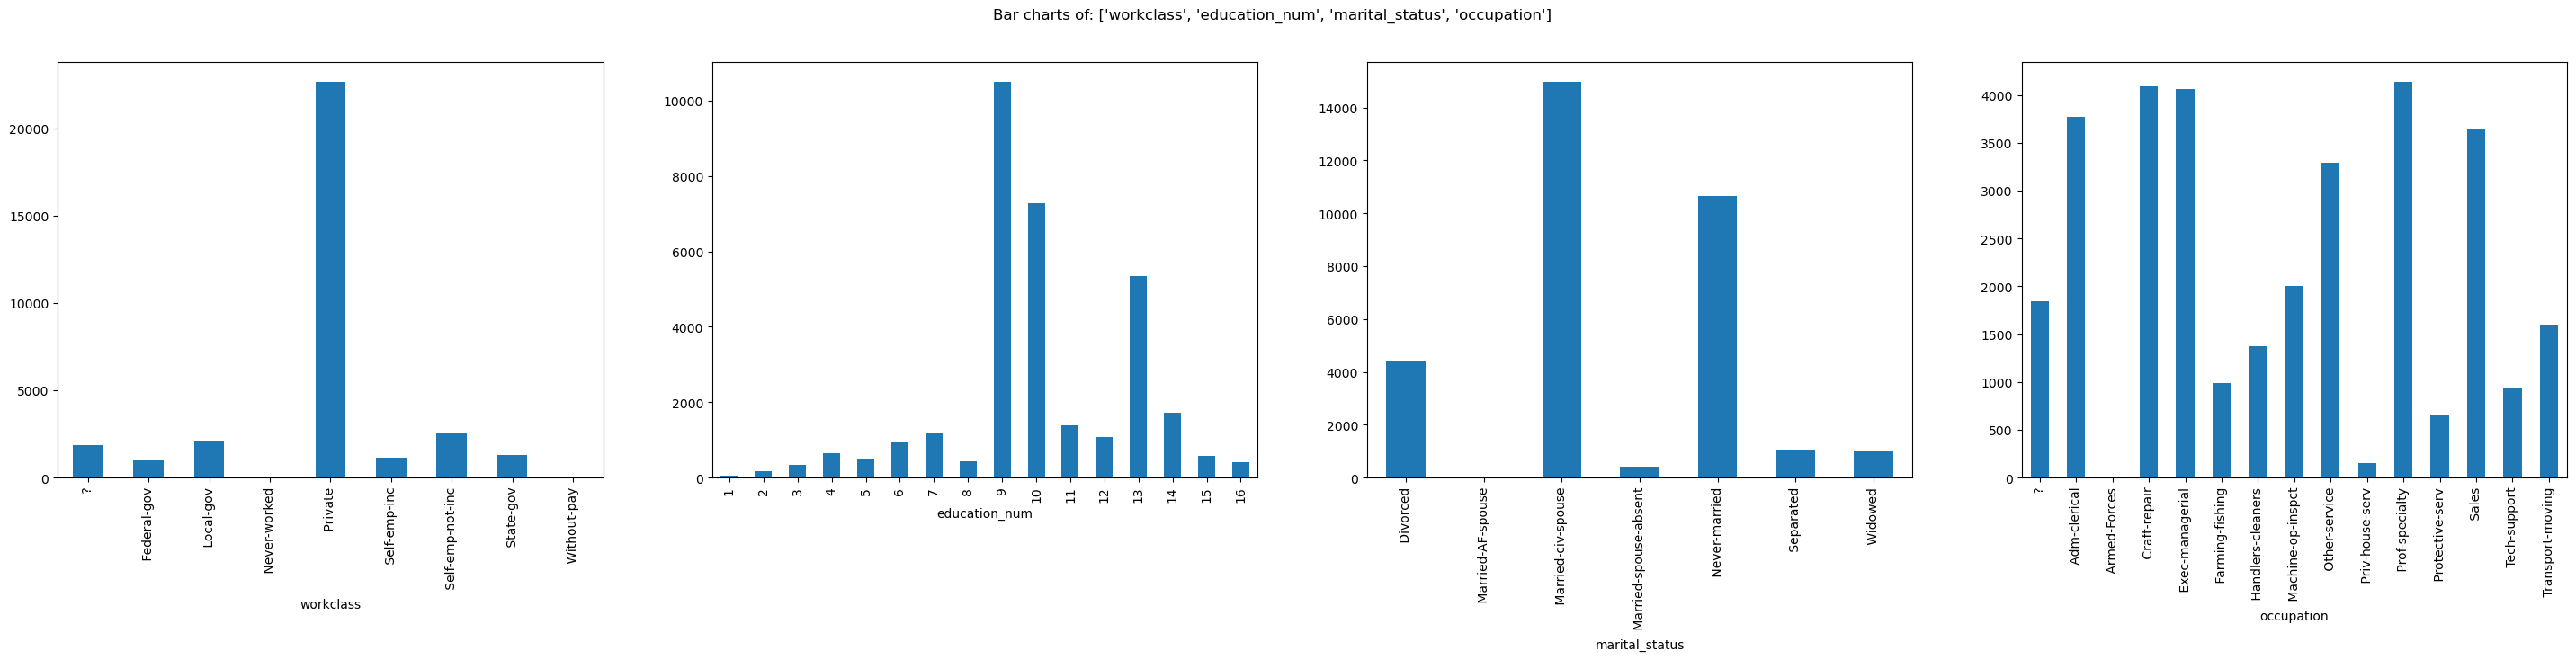

In [13]:
# Calling the function for 5 columns
PlotBarCharts(inpData=SalaryData, 
              colsToPlot=['workclass', 'education_num', 'marital_status', 'occupation'])

#### Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

The ideal bar chart looks like the chart of "occupation" column. Where each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution like "native_country" where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, all the categorical columns except "native_country" have satisfactory distribution to be considered for machine learning.

<b>Selected Categorical Variables</b>: All the categorical variables are selected except "native_country".

'workclass', 'education', 'marital_status','occupation', 'relationship', 'race', 'sex'

In [14]:
#SalaryData['native_country'].unique()
#SalaryData.groupby('native_country').size()
#SalaryData.native_country.value_counts(). United_States
#count the values for United-States
(SalaryData.native_country == ' United-States').sum()


29153

In [15]:
# Feature engineering
targets = np.where(SalaryData['native_country']== ' United-States', 1, 0 )
targets

array([1, 1, 1, ..., 1, 1, 1])

In [16]:
#create new column 'IsUS' 
SalaryData['IsUS'] = targets
SalaryData.head()


,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital.loss,hours_per_week,native_country,SalaryGT50K,IsUS
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,1
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,1
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,1
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,1
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0


In [17]:
#remove native_country column
SalaryData= SalaryData.drop('native_country', axis=1)
SalaryData.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital.loss,hours_per_week,SalaryGT50K,IsUS
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,1
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0,1
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,1
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0,1
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0,0


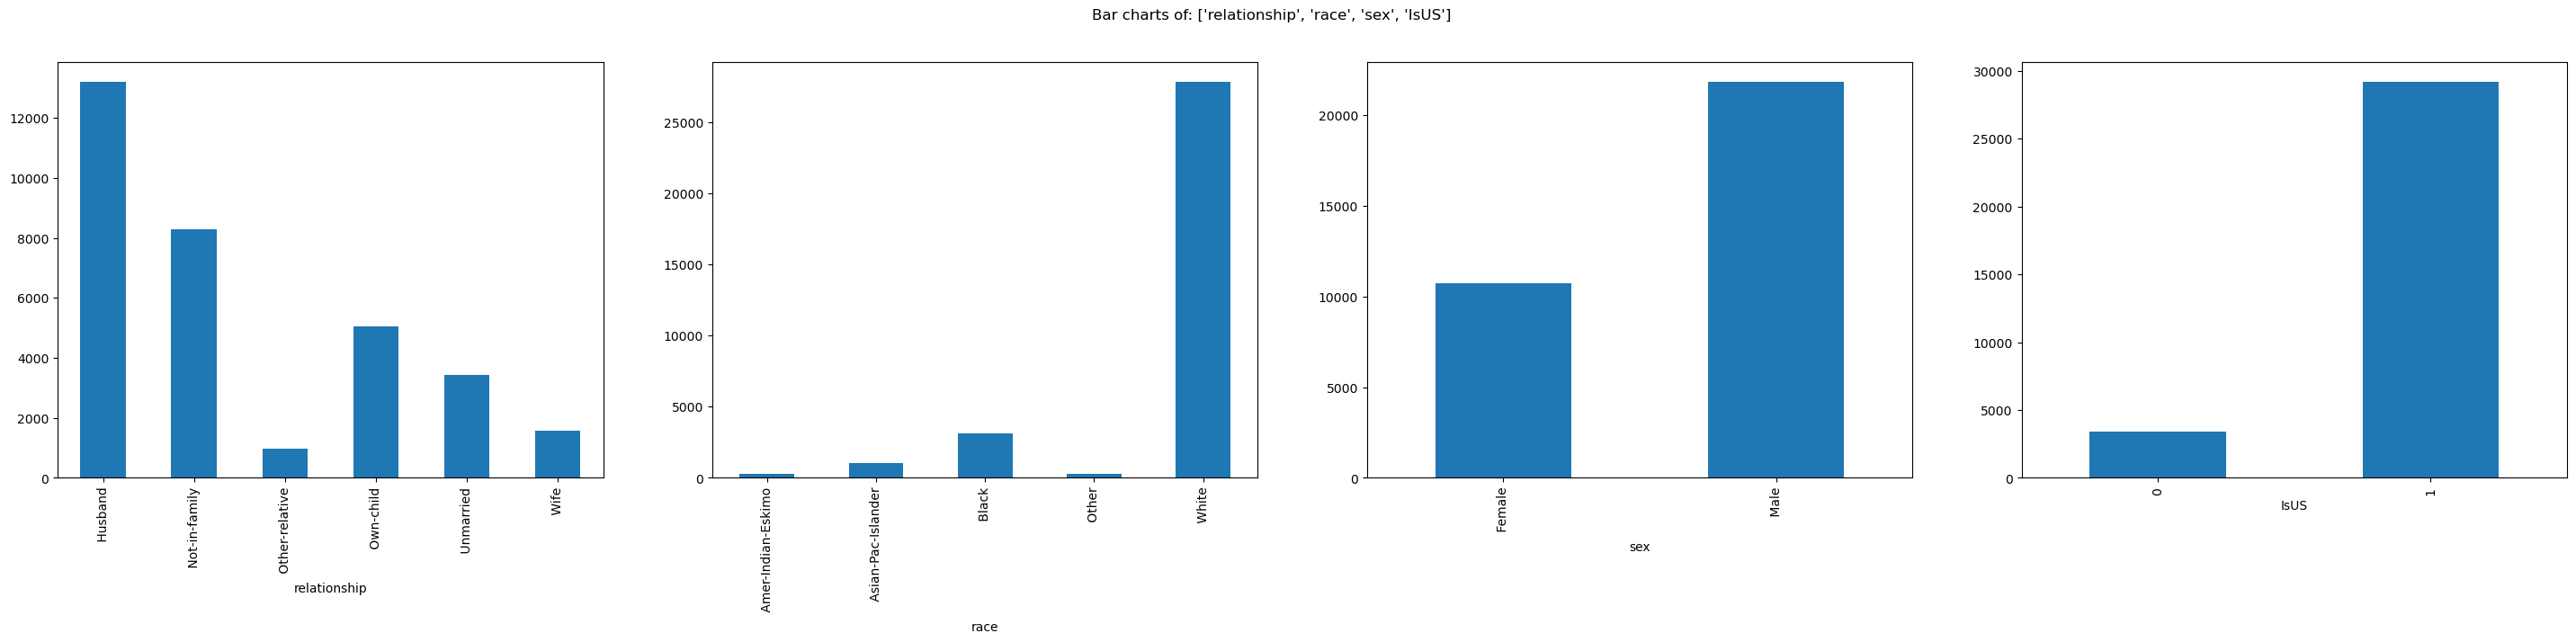

In [18]:
# Calling the function for 5 columns
PlotBarCharts(inpData=SalaryData, 
              colsToPlot=['relationship', 'race', 'sex', 'IsUS'])

### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, There are five continuous predictor variables 'age', 'fnlwgt','capital_gain','capital.loss', and 'hours_per_week'

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'capital_gain'}>,
        <AxesSubplot:title={'center':'capital.loss'}>],
       [<AxesSubplot:title={'center':'hours_per_week'}>, <AxesSubplot:>]],
      dtype=object)

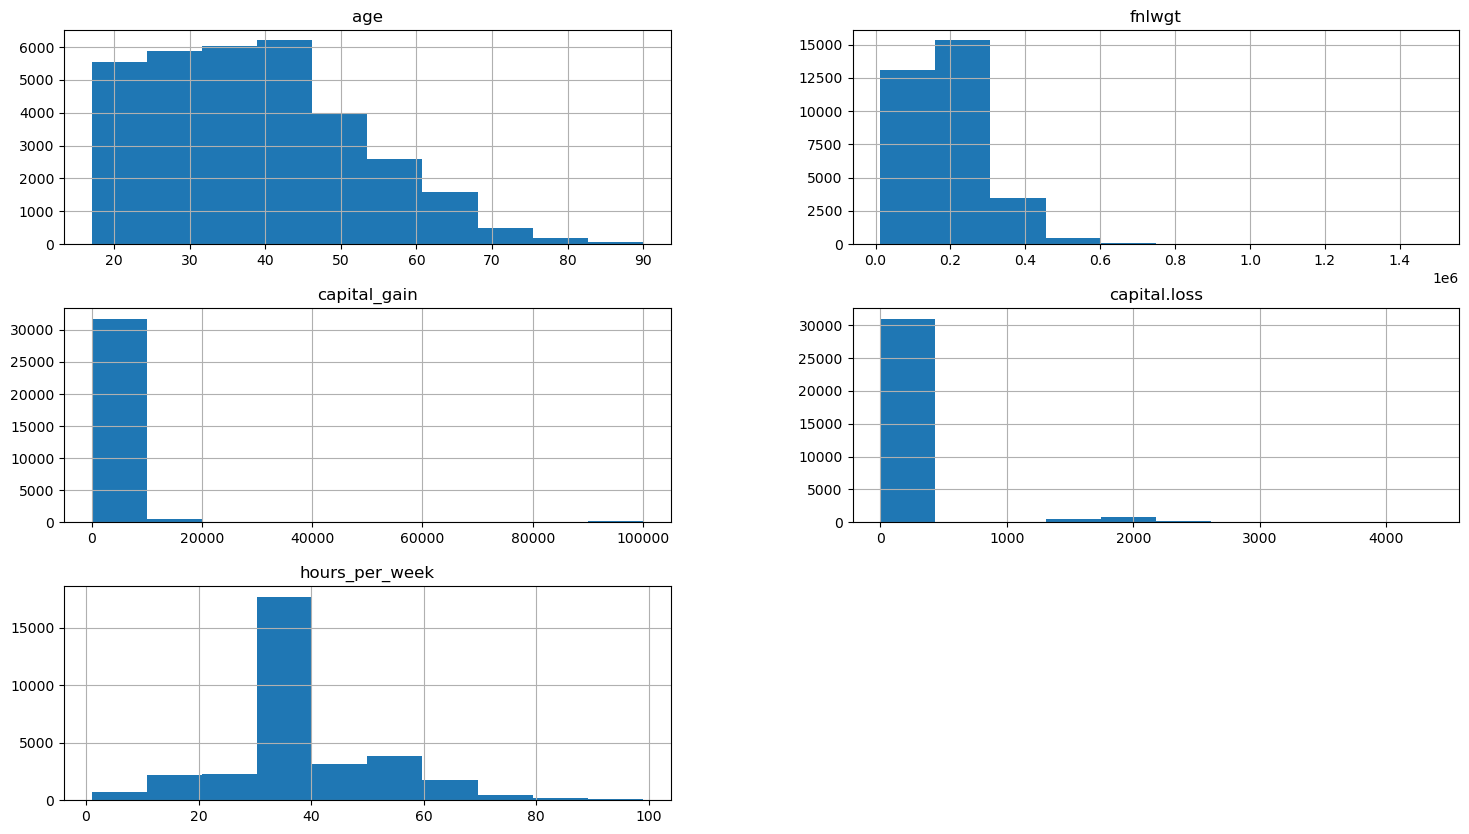

In [19]:
# Plotting histograms of multiple columns together
SalaryData.hist(['age','fnlwgt', 'capital_gain','capital.loss','hours_per_week'], figsize=(18,10))

#### Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "age", there are around 6200 rows in data that has a age between 40 to 45.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

Selected Continuous Variables:

* <b>age</b> : Selected.
* <b>fnlwgt</b>: Selected. Outliers seen beyond 600000, need to treat them.
* <b>capital_gain</b>: Selected. Outliers seen beyond 40000, need to treat them.
* <b>capital.loss</b>: Selected. Outliers seen beyond 1000, need to treat them.
* <b>hours_per_week</b>: Selected. Distribution looks good.

# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

Why I should treat the outliers?

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.
* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

#### Replacing outliers for 'fnlwgt'

In [20]:
# Finding nearest values to 600000 mark
#SalaryData['fnlwgt'][SalaryData['fnlwgt']>599000].sort_values()

Above result shows the nearest logical value is 599629, hence, replacing any value above 600000 with it.

In [21]:
# Replacing outliers with nearest possibe value
#SalaryData['fnlwgt'][SalaryData['fnlwgt']>600000] = 599629

#### Replacing outliers for 'capital_gain'

In [22]:
# Finding nearest values to 40000 mark
SalaryData['capital_gain'][SalaryData['capital_gain']>40000].sort_values()

6433     41310
20176    41310
20987    99999
21188    99999
21489    99999
         ...  
12062    99999
12093    99999
12141    99999
32238    99999
32518    99999
Name: capital_gain, Length: 161, dtype: int64

Above result shows the nearest logical value is 41310, hence, replacing any value above 40000 with it.

In [23]:
# Replacing outliers with nearest possibe value
SalaryData['capital_gain'][SalaryData['capital_gain']>40000] = 41310

#### Replacing outliers for 'capital.loss'

In [24]:
# Finding nearest values to 1000 mark
#SalaryData['capital.loss'][SalaryData['capital.loss']<1000].sort_values(ascending=False)
#SalaryData['capital.loss'][SalaryData['capital.loss']>1500].sort_values()

The nearest value is 974, hence updating all outliers beyond 1000 with 974

In [25]:
# Replacing outliers with nearest possibe value
#SalaryData['capital.loss'][SalaryData['capital.loss']>1000] = 974

### Visualizing distribution after outlier treatment
The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

array([[<AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'capital_gain'}>],
       [<AxesSubplot:title={'center':'capital.loss'}>, <AxesSubplot:>]],
      dtype=object)

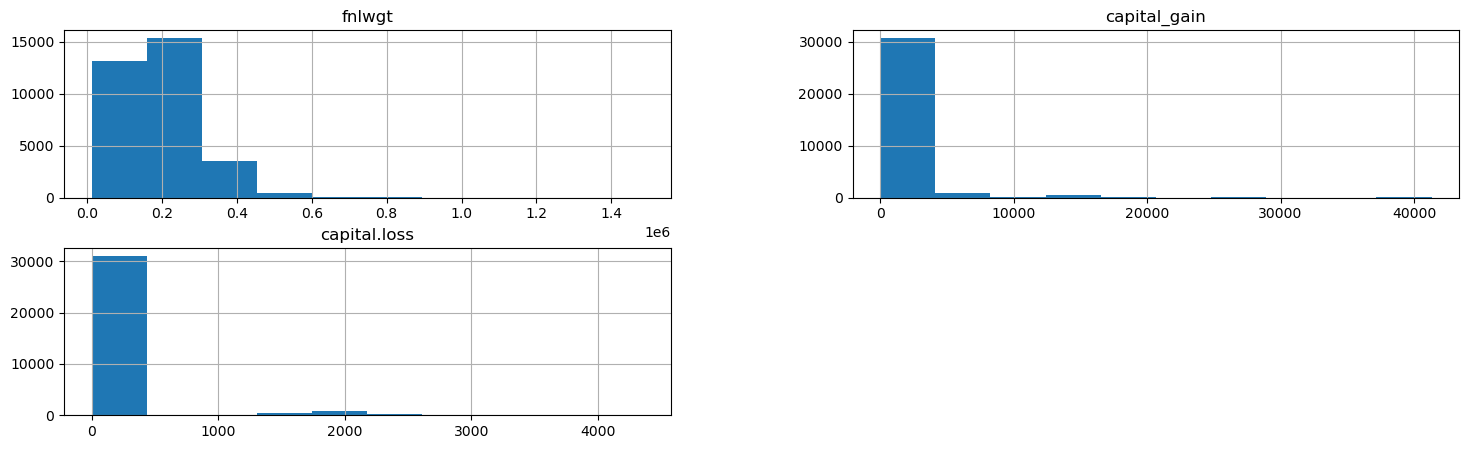

In [26]:
SalaryData.hist(['fnlwgt','capital_gain','capital.loss'], figsize=(18,5))

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Interpolate the values based on business logic
* Interpolate the values based on nearby values
* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables

In [27]:
# Finding how many missing values are there for each column
SalaryData.isnull().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital.loss      0
hours_per_week    0
SalaryGT50K       0
IsUS              0
dtype: int64

##### No missing values in this data.

# Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.
### Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

### Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

#### In this case study the Target variable is Continuous, hence below two scenarios will be present
* Categorical Target Variable Vs Continuous Predictor
* Categorical Target Variable Vs Categorical Predictor

### Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

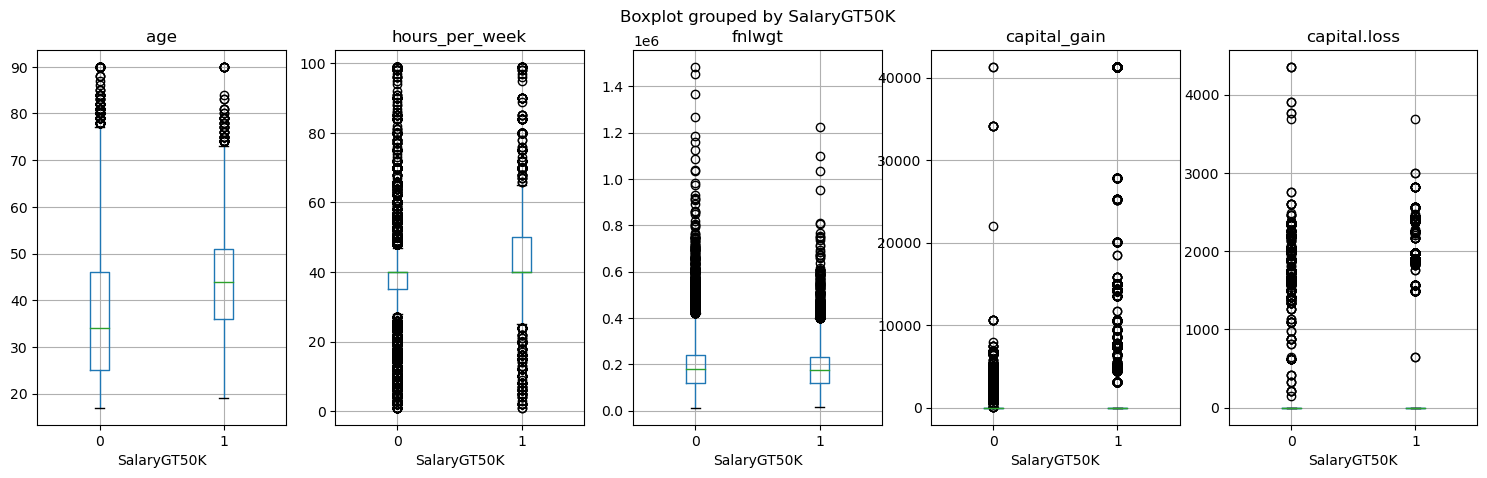

In [28]:
# Box plots for Categorical Target Variable "SalaryGT50K" and continuous predictors
ContinuousColsList=['age','hours_per_week','fnlwgt','capital_gain','capital.loss']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "SalaryGT50K"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    SalaryData.boxplot(column=PredictorCol, by='SalaryGT50K', figsize=(5,5), vert=True, ax=PlotCanvas[i])


#### Box-Plots interpretation
What should you look for in these box plots?

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

For example, look at the first chart "fnlwgt" Vs "SalaryGT50K". The boxes are in the same line! It means that people who have income greater than 50K have no dependency on the final weight given to the population in their area. Hence, I cannot distinguish between approval and rejection based on the fnlwgt. So this column is NOT correlated with the SalaryGT50K.

The other four charts exhibit opposite characteristics. Means the the data distribution is different(the boxes are not in same line!) for each category of salary. It hints that these variables might be correlated with SalaryGT50K.

We confirm this by looking at the results of ANOVA test below

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [29]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [30]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['age','hours_per_week','fnlwgt','capital_gain','capital.loss']
FunctionAnova(inpData=SalaryData, TargetVariable='SalaryGT50K', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

age is correlated with SalaryGT50K | P-Value: 0.0
hours_per_week is correlated with SalaryGT50K | P-Value: 0.0
fnlwgt is NOT correlated with SalaryGT50K | P-Value: 0.08652724317934667
capital_gain is correlated with SalaryGT50K | P-Value: 0.0
capital.loss is correlated with SalaryGT50K | P-Value: 4.022159409234092e-164


['age', 'hours_per_week', 'capital_gain', 'capital.loss']

The results of ANOVA confirm our visual analysis using box plots above.

#### Final selected Continuous columns:

'age', 'hours_per_week', 'capital_gain', 'capital.loss'

### Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

In [31]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=SalaryData['marital_status'], columns=SalaryData['SalaryGT50K'])
CrossTabResult

SalaryGT50K,0,1
marital_status,,
Divorced,3978,463
Married-AF-spouse,13,10
Married-civ-spouse,8280,6690
Married-spouse-absent,384,34
Never-married,10176,491
Separated,959,66
Widowed,908,85


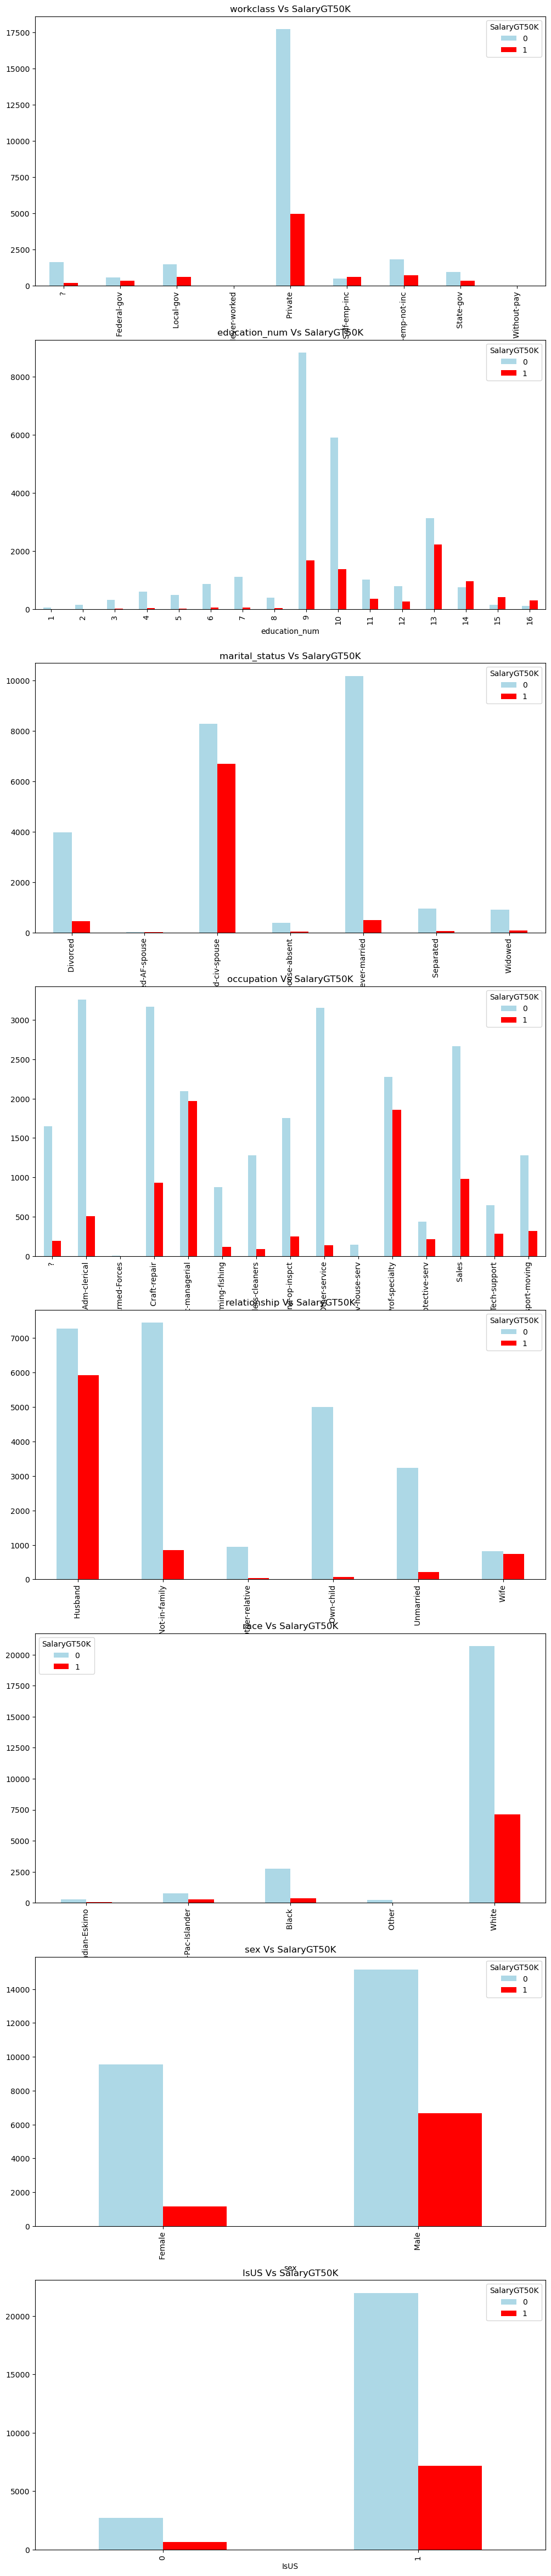

In [32]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['workclass', 'education_num', 'marital_status','occupation',
                    'relationship', 'race', 'sex', 'IsUS']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(12,60))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "SalaryGT50K"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=SalaryData[CategoricalCol], columns=SalaryData['SalaryGT50K'])
    CrossTabResult.plot.bar(color=['lightblue','red'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'SalaryGT50K')

### Grouped Bar charts Interpretation
What to look for in these grouped bar charts?

These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated.

On the other hand, look at the marital_status vs SalaryGT50K plot. The bars are different for each category, Hence, two columns are correlated with each other.

We confirm this analysis in below section by using Chi-Square Tests.

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test
Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [33]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [34]:
CategoricalVariables=['workclass', 'education_num', 'marital_status','occupation',
                    'relationship', 'race', 'sex', 'IsUS']

# Calling the function
FunctionChisq(inpData=SalaryData, 
              TargetVariable='SalaryGT50K',
              CategoricalVariablesList= CategoricalVariables)

workclass is correlated with SalaryGT50K | P-Value: 3.352256069028484e-220
education_num is correlated with SalaryGT50K | P-Value: 0.0
marital_status is correlated with SalaryGT50K | P-Value: 0.0
occupation is correlated with SalaryGT50K | P-Value: 0.0
relationship is correlated with SalaryGT50K | P-Value: 0.0
race is correlated with SalaryGT50K | P-Value: 2.2797874171824478e-70
sex is correlated with SalaryGT50K | P-Value: 0.0
IsUS is correlated with SalaryGT50K | P-Value: 7.804143463331444e-10


['workclass',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'IsUS']

#### Finally selected Categorical variables:

'workclass', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'IsUS'

 

###  Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [35]:
SalaryData['sex'].unique()


array([' Male', ' Female'], dtype=object)

In [36]:
#trimming extra spaces 
SalaryData['sex'] = SalaryData['sex'].str.strip()
#after trimming
SalaryData['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [37]:
SelectedColumns=['workclass', 'education_num', 'marital_status', 'occupation', 
                 'relationship', 'race', 'sex', 'IsUS','age', 'hours_per_week',
                 'capital_gain', 'capital.loss']

# Selecting final columns
DataForML=SalaryData[SelectedColumns]
DataForML.head()


,workclass,education_num,marital_status,occupation,relationship,race,sex,IsUS,age,hours_per_week,capital_gain,capital.loss
0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,39,40,2174,0
1,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,1,50,13,0,0
2,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,1,38,40,0,0
3,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,1,53,40,0,0
4,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,28,40,0,0


In [38]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

# Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

#### 1. Converting each Ordinal Categorical columns to numeric

In this data there is no Ordinal categorical variable

#### 2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping

In [39]:
# Converting the binary nominal variable sex to numeric
# Notice the space in the values!! The data was like that
DataForML['sex'].replace({'Female':0, 'Male':1}, inplace=True)

#### 3. Converting all other nominal categorical columns to numeric using pd.get_dummies()

In [40]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['SalaryGT50K']=SalaryData['SalaryGT50K']

# Printing sample rows
DataForML_Numeric.head()

,education_num,sex,IsUS,age,hours_per_week,capital_gain,capital.loss,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,SalaryGT50K
0,13,1,1,39,40,2174,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,13,1,1,50,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9,1,1,38,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,1,1,53,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,13,0,0,28,40,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


# Machine Learning: Splitting the data into Training and Testing sample
We don't use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [41]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['education_num', 'sex', 'IsUS', 'age', 'hours_per_week', 'capital_gain',
       'capital.loss', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',


In [42]:
# Separate Target Variable and Predictor Variables
TargetVariable='SalaryGT50K'
Predictors=['education_num', 'sex', 'IsUS', 'age', 'hours_per_week', 'capital_gain',
       'capital.loss', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_ Amer-Indian-Eskimo',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=369)

# Principal Component Analysis

### Applying PCA

In [43]:
X.shape

(32537, 49)

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# Creating maximum components equal to the total number of columns to analyze all of them
pca = PCA(n_components=X.shape[1])

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

#4 Columns present in X are now represented by 2 Principal components present in reduced_X
print(np.round(reduced_X[0:10],2))

[[ 1.382760e+03 -8.074000e+01 -1.200000e-01 -6.400000e-01 -2.860000e+00
   8.100000e-01  5.800000e-01 -7.400000e-01 -7.000000e-02 -1.700000e-01
  -2.300000e-01  1.000000e-02 -6.300000e-01 -5.100000e-01 -5.500000e-01
  -8.000000e-02  3.300000e-01  1.100000e-01  4.200000e-01 -3.000000e-02
   0.000000e+00 -6.000000e-02 -5.200000e-01  5.000000e-01 -8.000000e-02
   9.000000e-02  4.000000e-01 -3.700000e-01 -5.000000e-02 -1.900000e-01
   9.000000e-02  2.000000e-02 -1.000000e-02 -1.400000e-01 -1.000000e-02
   2.000000e-02  1.000000e-02  2.000000e-02 -1.000000e-02  0.000000e+00
  -0.000000e+00  0.000000e+00 -0.000000e+00 -0.000000e+00  0.000000e+00
  -0.000000e+00  0.000000e+00 -0.000000e+00  0.000000e+00]
 [-7.912200e+02 -9.118000e+01  4.630000e+00 -2.908000e+01 -3.830000e+00
  -1.260000e+00  5.200000e-01 -1.700000e-01 -2.600000e-01 -1.600000e-01
   1.200000e-01  8.300000e-01 -1.000000e-01  2.300000e-01 -1.300000e-01
  -6.100000e-01  1.700000e-01 -1.800000e-01 -1.000000e-01  5.600000e-01
  -6.

In [45]:
#Cumulative Variance explained by each component
var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_explained_cumulative)

[ 98.9 100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.
 100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.
 100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.
 100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.
 100. ]


Text(0, 0.5, '% Variance explained')

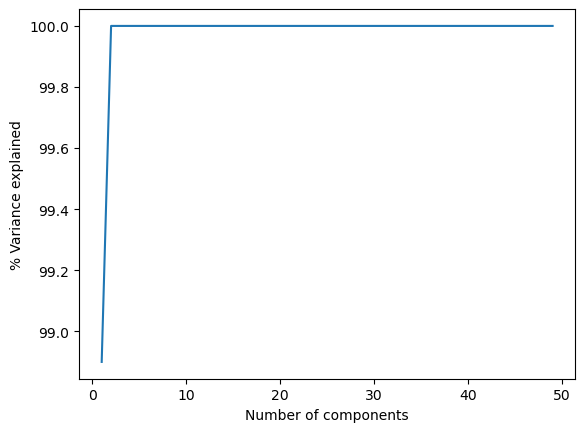

In [46]:
# By Looking at below graph we can see that 2 components are explaining maximum Variance in the dataset
# The elbow occurs at 33rd principal component
plt.plot( range(1,50), var_explained_cumulative)
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

In [47]:

# Creating final 2 components based on above curve
NumComponents=2
pca = PCA(n_components=NumComponents)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

#4 Columns present in X_train are now represented by 2 Principal components present in reduced_X_train
print(np.round(reduced_X[0:10],2))

[[ 1382.76   -80.74]
 [ -791.22   -91.18]
 [ -791.22   -91.16]
 [ -791.21   -91.13]
 [ -791.22   -91.18]
 [ -791.22   -91.16]
 [ -791.22   -91.19]
 [ -791.21   -91.12]
 [13292.62   -23.66]
 [ 4386.72   -66.34]]


Based on the above chart we can see that saturation is happening around 2 principal components. They are explaining around 98% of the total data variance.
Hence choosing 2 Principal components. With this, we were able to reduce the total number of columns significantly as compared to original 49 predictor columns.

In [48]:
pca.components_

array([[ 1.03945381e-04,  7.73182112e-06,  7.58330962e-07,
         3.83069719e-04,  3.06154455e-04,  9.99988383e-01,
        -4.79395423e-03, -1.20896265e-06, -3.97683809e-08,
        -3.51806290e-07, -1.16674108e-08, -5.43280176e-06,
         5.14972353e-06,  2.27374488e-06, -3.69515110e-07,
        -8.94680811e-09, -1.94736355e-06, -1.73731843e-08,
         1.43880268e-05, -2.44721674e-07, -1.07937503e-05,
        -7.99880549e-07, -5.84937570e-07, -1.22063006e-06,
        -3.08572344e-06, -1.50198664e-08, -2.20802601e-06,
         7.40757252e-06, -4.19215276e-07, -1.66270768e-06,
        -2.07220155e-06, -4.40599780e-06, -1.57206488e-07,
         8.59713123e-06, -2.37790982e-07,  9.69962225e-07,
        -3.52927239e-07, -1.13721958e-06,  1.29323988e-05,
        -3.41889224e-06, -1.05780927e-06, -7.02801768e-06,
        -2.93478717e-06,  1.50710756e-06, -1.08833729e-07,
         2.68259332e-07, -2.05700679e-06, -1.65547517e-07,
         2.06312871e-06],
       [ 5.55634929e-04,  5.62

In [49]:
# Equating reduced_X to X_train to let the other code run without changing everything
X=reduced_X
# Generating Predictor names
Predictors=pd.Series(['PC']*NumComponents).str.cat(pd.Series(range(1,NumComponents+1)).apply(str)).values
Predictors


array(['PC1', 'PC2'], dtype=object)

#### Using Principal Components as predictors
Now combining the Target variable with the principal components and preparing the data for machine learning.

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data. 

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [50]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [51]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22775, 2)
(22775,)
(9762, 2)
(9762,)


# Logistic Regression

In [52]:
import time
T1=time.time()
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithmd
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      7376
           1       0.82      0.28      0.41      2386

    accuracy                           0.81      9762
   macro avg       0.82      0.63      0.65      9762
weighted avg       0.81      0.81      0.77      9762

[[7235  141]
 [1725  661]]
Accuracy of the model on Testing Sample Data: 0.77

Accuracy values for 10-fold Cross Validation:
 [0.77589549 0.77805322 0.76757862 0.77734344 0.7737528  0.78544748
 0.7636411  0.7844286  0.77683581 0.78949518]

Final Average Accuracy of the model: 0.78
Time taken: 0.47936201095581055


# Decision Trees

DecisionTreeClassifier(max_depth=6)
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      7376
           1       0.97      0.30      0.46      2386

    accuracy                           0.83      9762
   macro avg       0.89      0.65      0.68      9762
weighted avg       0.85      0.83      0.79      9762

[[7352   24]
 [1671  715]]
Accuracy of the model on Testing Sample Data: 0.79

Accuracy values for 10-fold Cross Validation:
 [0.79442718 0.78954366 0.78557187 0.78827734 0.78410479 0.78905162
 0.77779103 0.79132104 0.78862578 0.79730998]

Final Average Accuracy of the model: 0.79
Time taken: 0.4599926471710205


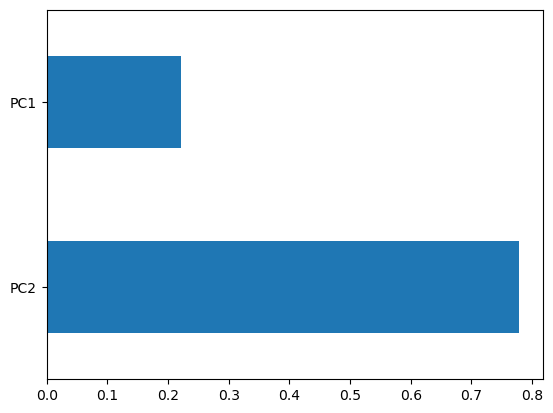

In [53]:
import time
T1=time.time()
#Decision Trees
from sklearn import tree
# choose from different tunable hyper parameters
# Choose various values of max_depth and criterion for tuning the model
clf = tree.DecisionTreeClassifier(max_depth=6,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

#### Plotting a Decision Tree

In [54]:
# Installing the required library for plotting the decision tree
#!pip install dtreeplt

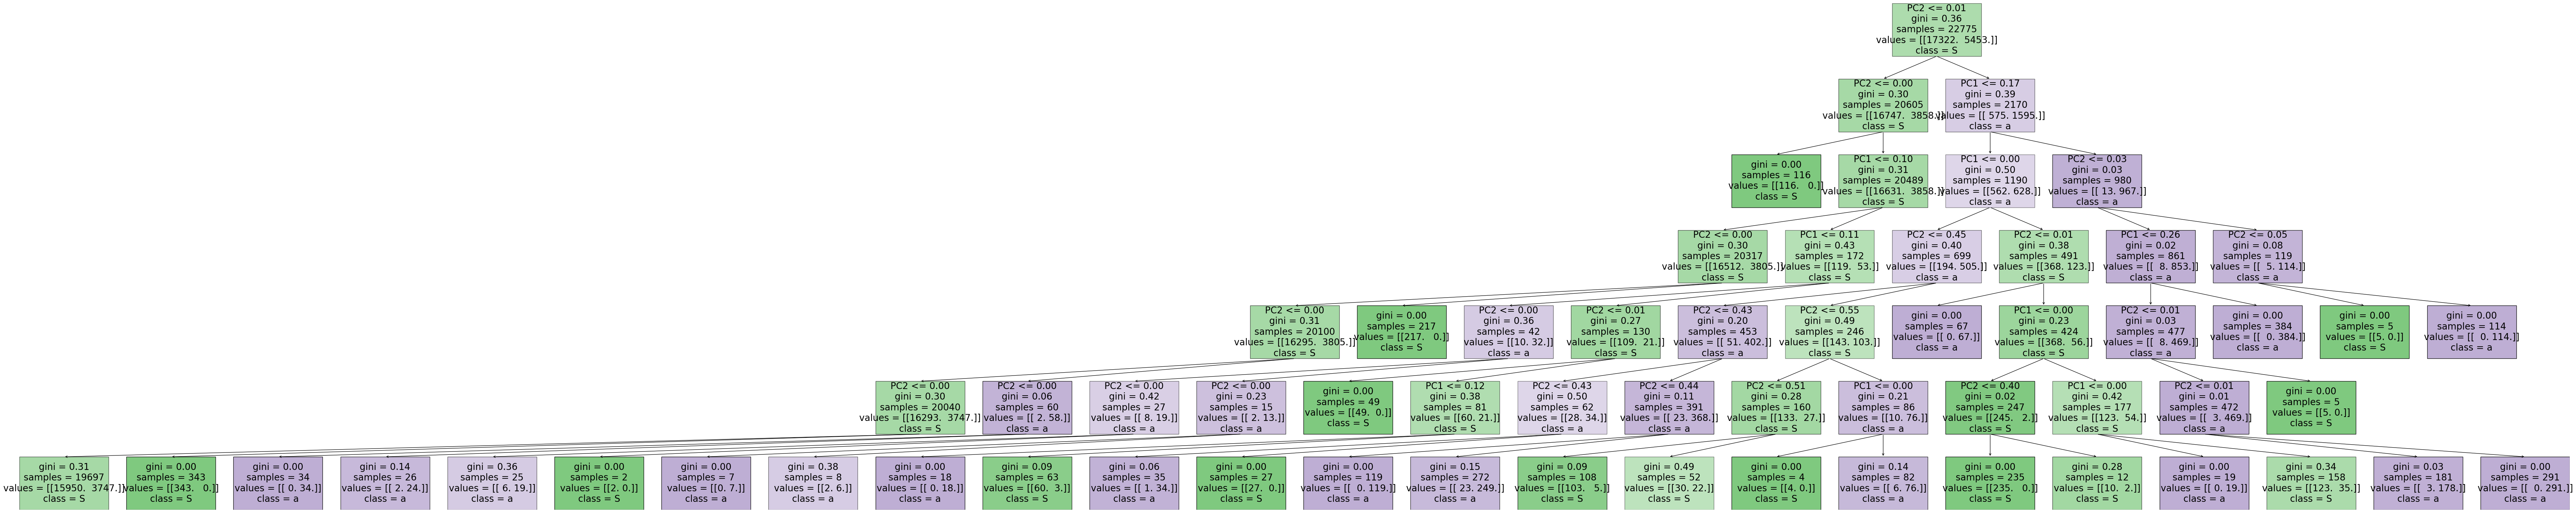

In [55]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(100,20)
# Double click on the graph to zoom in

# Random Forest

RandomForestClassifier(max_depth=4)
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      7376
           1       0.94      0.27      0.42      2386

    accuracy                           0.82      9762
   macro avg       0.88      0.63      0.66      9762
weighted avg       0.84      0.82      0.78      9762

[[7338   38]
 [1742  644]]
Accuracy of the model on Testing Sample Data: 0.78

Accuracy values for 10-fold Cross Validation:
 [0.78308338 0.78799489 0.76917657 0.78205316 0.77929984 0.78500364
 0.76841603 0.78904985 0.78172259 0.79164112]

Final Average Accuracy of the model: 0.78
Time taken: 11.316966772079468


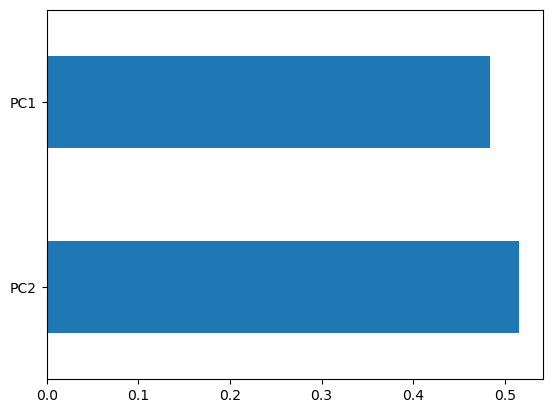

In [56]:
import time
T1=time.time()
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
clf = RandomForestClassifier(max_depth=4, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

T2=time.time()
print("Time taken:", T2-T1)

#### Plotting one of the Decision Trees in Random Forest

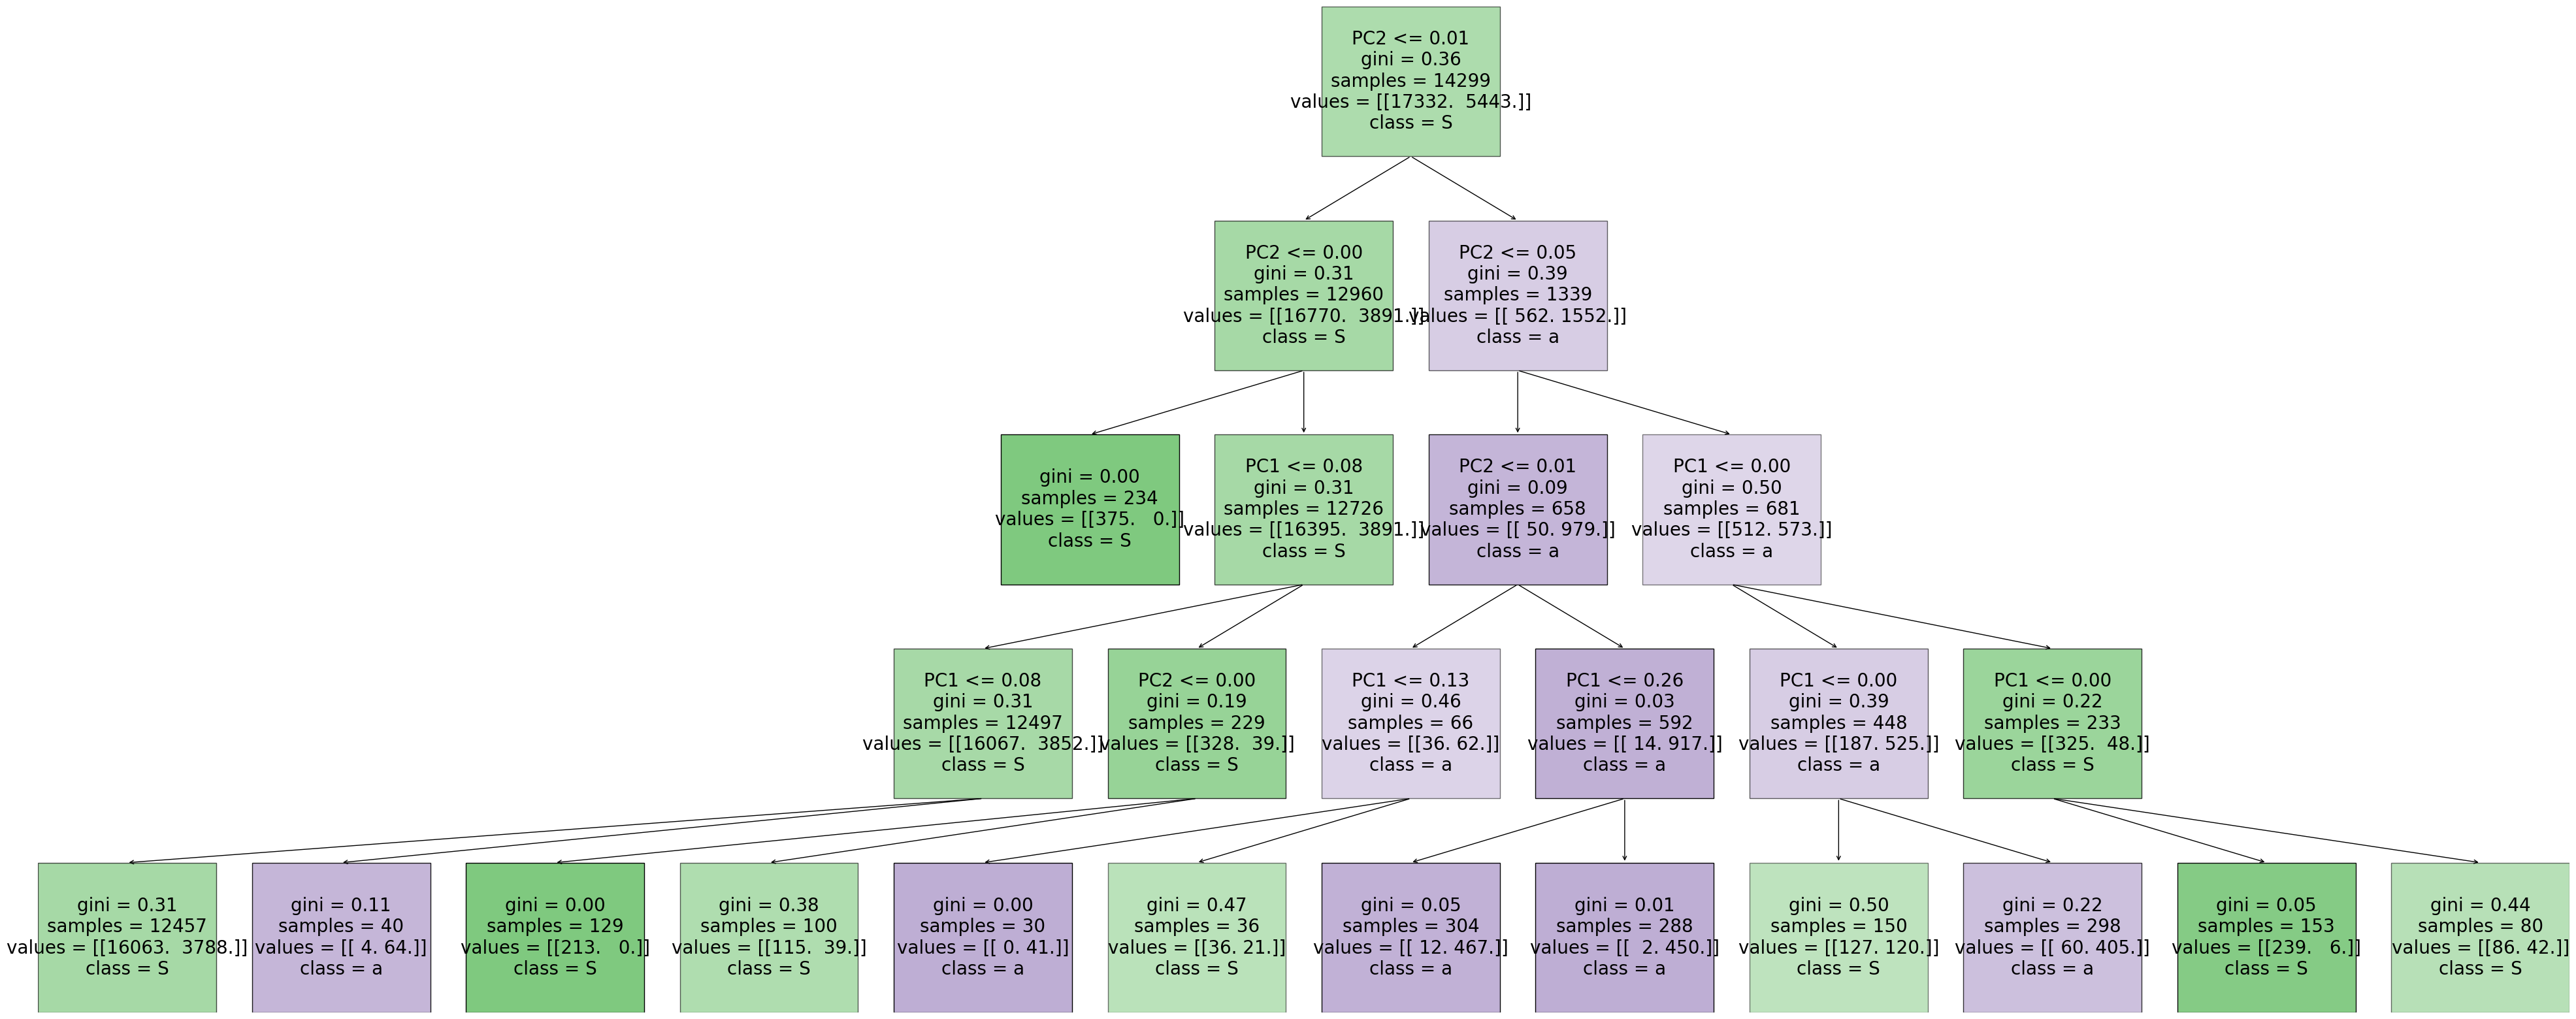

In [57]:
# PLotting a single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[3], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(50,20)
# Double click on the graph to zoom in

# AdaBoost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.01, n_estimators=100)
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      7376
           1       0.86      0.28      0.42      2386

    accuracy                           0.81      9762
   macro avg       0.83      0.63      0.65      9762
weighted avg       0.82      0.81      0.77      9762

[[7266  110]
 [1729  657]]
Accuracy of the model on Testing Sample Data: 0.77

Accuracy values for 10-fold Cross Validation:
 [0.77695209 0.78312532 0.76805796 0.7796581  0.77501287 0.78330133
 0.76209779 0.78478717 0.77865226 0.78961493]

Final Average Accuracy of the model: 0.78
Time taken: 15.582144260406494


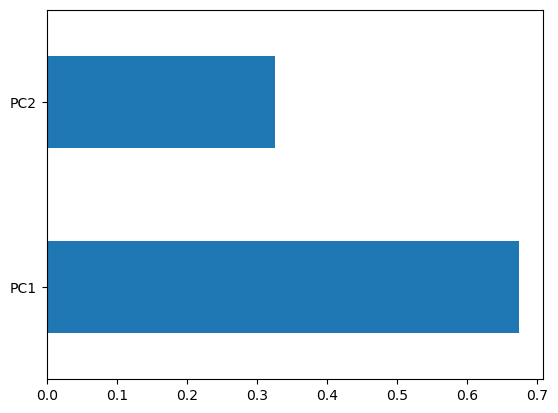

In [58]:
import time
T1=time.time()
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
# Choose different values of max_depth, n_estimators and learning_rate to tune the model
DTC=DecisionTreeClassifier(max_depth=2)
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

T2=time.time()
print("Time taken:", T2-T1)

#### Plotting one of the Decision trees from Adaboost

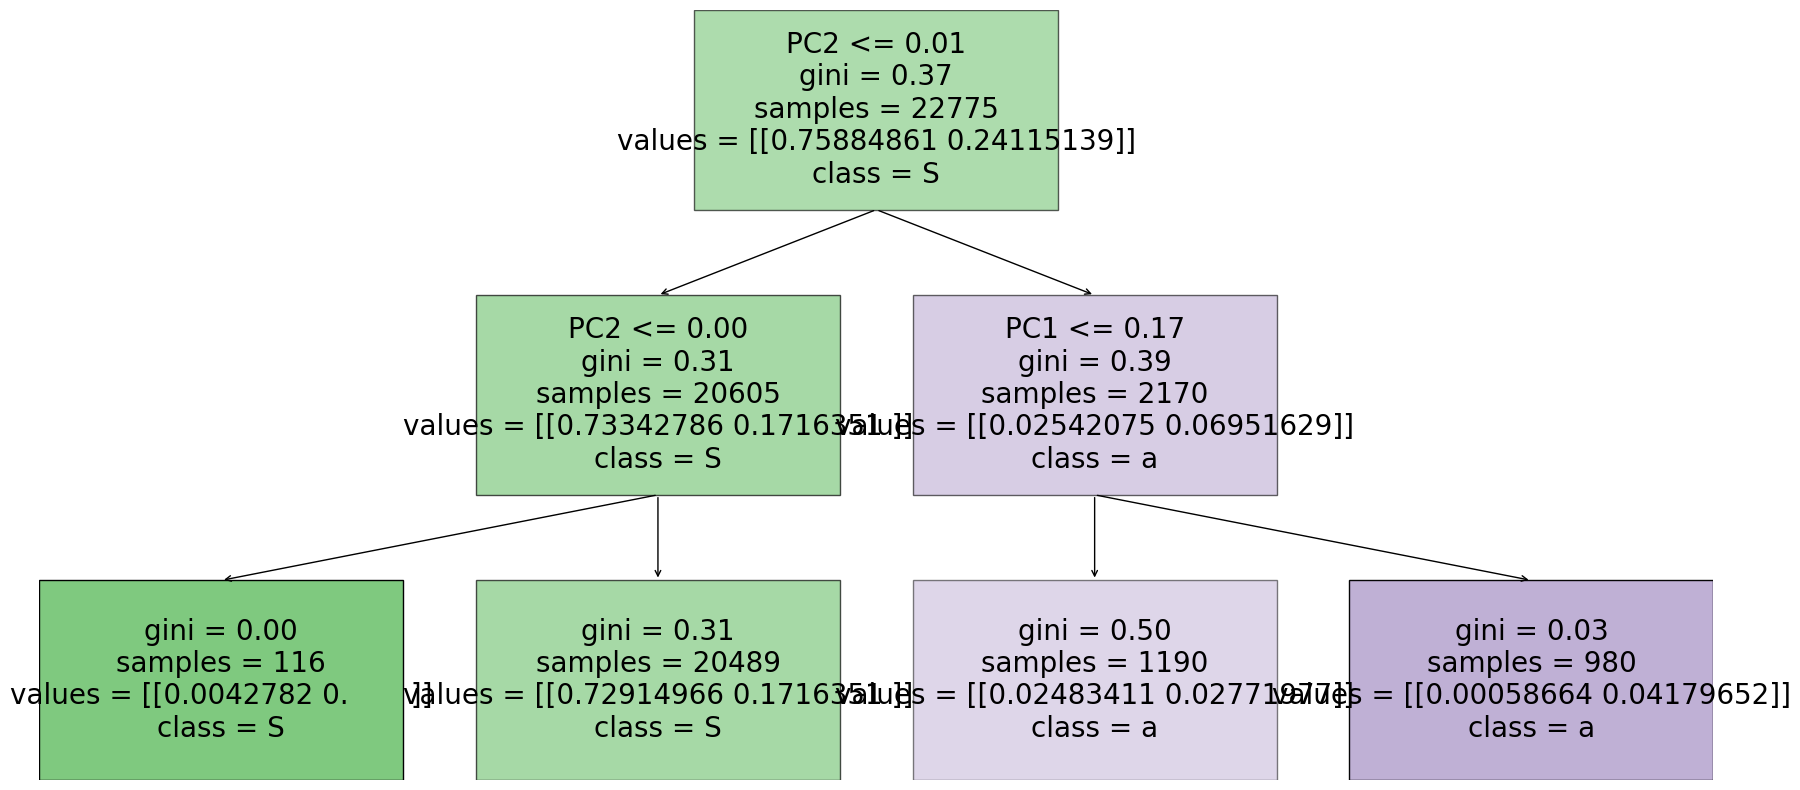

In [59]:
# PLotting 1st single Decision Tree from Adaboost
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[1], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

# XGBoost

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      7376
           1       0.96      0.30      0.46      2386

    accuracy                           0.83      9762
   macro avg       0.89      0.65      0.

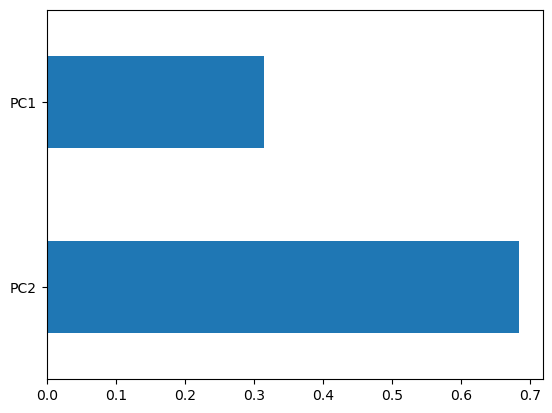

In [60]:
import time
T1=time.time()
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
T2=time.time()
print("Time taken:", T2-T1)

In [61]:
# Setting up the os path for the Graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:\\ProgramData\\Anaconda3\\Library\\bin\\graphviz'

<AxesSubplot:>

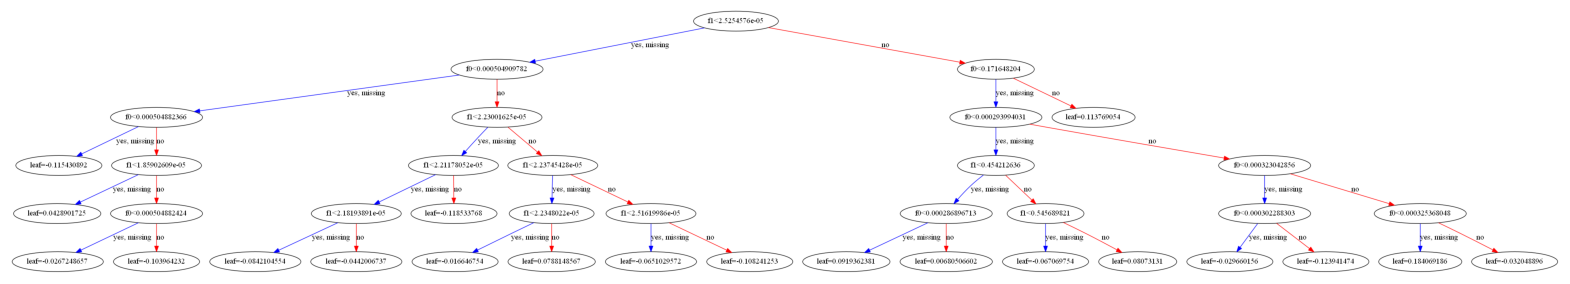

In [62]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

# KNN

In [63]:
import time
T1=time.time()
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN
T2=time.time()
print("Time taken:", T2-T1)

KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7376
           1       0.54      0.57      0.56      2386

    accuracy                           0.78      9762
   macro avg       0.70      0.71      0.70      9762
weighted avg       0.78      0.78      0.78      9762

[[6237 1139]
 [1031 1355]]
Accuracy of the model on Testing Sample Data: 0.78

Accuracy values for 10-fold Cross Validation:
 [0.78214587 0.78232549 0.78458202 0.78771604 0.79498091 0.79427958
 0.77578943 0.79041583 0.7915769  0.78852612]

Final Average Accuracy of the model: 0.79
Time taken: 1.04067063331604


# SVM

In [64]:
# #coudn't run
# import time
# T1=time.time()
# # Support Vector Machines(SVM)
# from sklearn import svm
# clf = svm.SVC(C=1, kernel='rbf', gamma=0.01)

# # Printing all the parameters of SVM
# print(clf)

# # Creating the model on Training Data
# SVM=clf.fit(X_train,y_train)
# prediction=SVM.predict(X_test)

# # Measuring accuracy on Testing Data
# from sklearn import metrics
# print(metrics.classification_report(y_test, prediction))
# print(metrics.confusion_matrix(y_test, prediction))

# # Printing the Overall Accuracy of the model
# F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
# print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# # Importing cross validation function from sklearn
# from sklearn.model_selection import cross_val_score

# # Running 10-Fold Cross validation on a given algorithm
# # Passing full data X and y because the K-fold will split the data and automatically choose train/test
# Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
# print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
# print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# # Plotting the feature importance for Top 10 most important columns
# # The built in attribute SVM.coef_ works only for linear kernel

# %matplotlib inline
# #feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
# #feature_importances.nlargest(10).plot(kind='barh')
# T2=time.time()
# print("Time taken:", T2-T1)

# Naive Bayes

In [65]:
import time
T1=time.time()
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

GaussianNB()
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      7376
           1       0.64      0.31      0.42      2386

    accuracy                           0.79      9762
   macro avg       0.73      0.63      0.65      9762
weighted avg       0.77      0.79      0.76      9762

[[6963  413]
 [1642  744]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.76367816 0.76582773 0.75905748 0.7638792  0.76306011 0.77357828
 0.74978629 0.76786497 0.76365475 0.77637552]

Final Average Accuracy of the model: 0.76
Time taken: 0.0840463638305664


# Deployment of the Model
Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing <b>Logistic Regression</b> as the final model since it is very fast on this data.

In order to deploy the model we follow below steps

* Train the model using 100% data available
* Save the model as a serialized file which can be stored anywhere
* Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

### Training the best model on Full Data

#### Step 1. Retraining the model using 100% data

In [66]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Training the model on 100% Data available
FinalLOGModel=clf.fit(X,y)


#### Cross validating the final model accuracy with less predictors

In [67]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(FinalLOGModel, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.77589549 0.77805322 0.76757862 0.77734344 0.7737528  0.78544748
 0.7636411  0.7844286  0.77683581 0.78949518]

Final Average Accuracy of the model: 0.78


#### Step 2. Save the model as a serialized file which can be stored anywhere

In [68]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('FinalLOGModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalLOGModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
#print('pickle file of Predictive Model is saved at Location:',os.getcwd())

#### Step 3. Create a python function
In this data, the most important predictor variables are 'marital_status', 'education_num','capital_gain','capital.loss','age', 'hours_per_week' and 'occupation' As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables

In [69]:
# This Function can be called from any from any front end tool/website
def PredictSalaryBand(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Converting the binary nominal variable sex to numeric
    # Notice the space in the values!! The data was like that
    #InputData['sex'].replace({' Female':0, ' Male':1}, inplace=True)
    # Also, if standardization/normalization was done, then same must be done for new input
    
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Converting the binary nominal variable sex to numeric
    InputData['sex'].replace({'Female':0, 'Male':1}, inplace=True)
   
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
        
    # Maintaining the same order of columns as it was during the model training
    Predictors=['education_num', 'sex', 'IsUS', 'age', 'hours_per_week', 'capital_gain',
       'capital.loss', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_ Amer-Indian-Eskimo',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
        
    # calculating the principal components
    reduced_X = pca_fit.transform(X)
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(reduced_X)
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalLOGModel.pkl', 'rb') as fileReadStream:
        FinalLOGModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=FinalLOGModel.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

In [70]:
# Calling the function for some salary predictions
NewEmployeeDetails=pd.DataFrame(
data=[['Private',14,'Never-married','Prof-specialty','Not-in-family','White','Female',1,31,50,14084,0],
      ['State-gov',13,'Never-married','Adm-clerical','Not-in-family','White','Male',1,39,40,2174,0]],
columns=['workclass', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
         'IsUS','age', 'hours_per_week','capital_gain', 'capital.loss'])

print(NewEmployeeDetails)

# Calling the Function for prediction
PredictSalaryBand(InputData= NewEmployeeDetails)


   workclass  education_num marital_status      occupation   relationship  \
0    Private             14  Never-married  Prof-specialty  Not-in-family   
1  State-gov             13  Never-married    Adm-clerical  Not-in-family   

    race     sex  IsUS  age  hours_per_week  capital_gain  capital.loss  
0  White  Female     1   31              50         14084             0  
1  White    Male     1   39              40          2174             0  


,Predicted Status
0,1
1,0


The Function <b>FunctionPredictResult</b> can be used to produce the predictions for one or more cases at a time. Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the available cases.